In [1]:
import sys
sys.path.append("../AutoStock/")
from request.dao import Dao
from PyQt5.QtWidgets import QApplication
from pandas import DataFrame
from entity.stock import Stock
from request.enum.stockEnum import CandleUnit
import matplotlib.pyplot as plt
from datetime import datetime

app = QApplication([])
Dao().login()

In [4]:
e_mart = Dao().request_stock_instance("139480")
print(e_mart.get_code_name())


139480


In [5]:
a= Dao().get_today_date()
a


'20210116'

In [6]:
data = Dao().request_candle_data(e_mart,CandleUnit.MINUTE,15)
data

,time,open,close,low,high,volume,percentage,ma5,ma10,ma20,ma60
0,2021-01-15 15:30:00,174500,174500,174500,174500,12273,0.000000,NaN,NaN,NaN,NaN
1,2021-01-15 15:15:00,175000,175000,174500,175500,4541,0.000000,NaN,NaN,NaN,NaN
2,2021-01-15 15:00:00,175000,175500,174500,176000,11759,0.285714,NaN,NaN,NaN,NaN
3,2021-01-15 14:45:00,175500,175000,174500,176000,12341,-0.284900,NaN,NaN,NaN,NaN
4,2021-01-15 14:30:00,175000,175500,174500,176000,9584,0.285714,175100.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
495,2020-12-17 12:15:00,151500,152000,151500,152500,6955,0.330033,151600.0,151650.0,151775.0,151991.666667
496,2020-12-17 12:00:00,151500,151500,151000,152000,2378,0.000000,151600.0,151650.0,151725.0,151983.333333
497,2020-12-17 11:45:00,151500,151000,151000,152000,6003,-0.330033,151500.0,151600.0,151650.0,151966.666667
498,2020-12-17 11:30:00,151500,151500,151500,152000,7359,0.000000,151500.0,151550.0,151625.0,151950.000000


In [7]:

# plt.plot(data.time, data.ma5, label='ma5')
# plt.xlabel('time')
# plt.ylabel('close')
# plt.legend(loc="best")
# plt.grid()
# plt.show()

In [8]:
import mpl_finance 
import matplotlib.ticker as ticker
%matplotlib inline

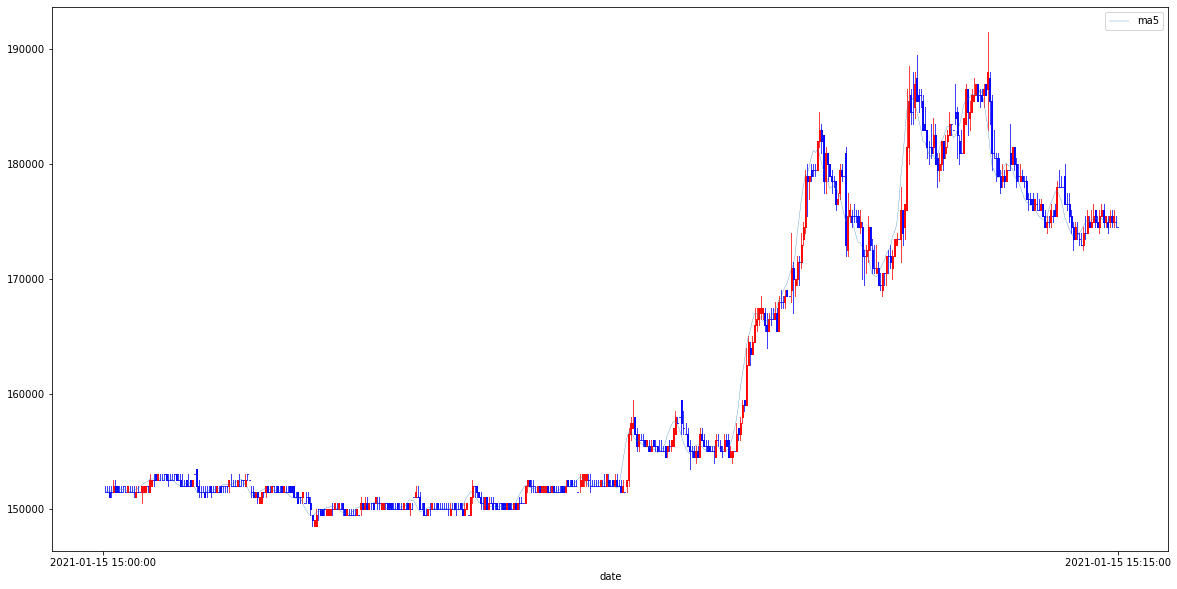

In [9]:
fig = plt.figure(figsize=(20,10))
ax=fig.add_subplot(111)

ax.plot(data.index, data.ma5, label="ma5", linewidth='0.3')
ax.xaxis.set_major_locator(ticker.MaxNLocator(1))
ax.xaxis.set_major_formatter(ticker.FixedFormatter(data.time))
ax.invert_xaxis()
ax.set_xlabel("date")

mpl_finance.candlestick2_ohlc(ax, data.open, data.high, data.low, data.close, width=0.5, colorup='r', colordown='b')
plt.legend(loc="best")
plt.show()

In [19]:
import FinanceDataReader as fd

fd.StockListing("KOSPI")


ModuleNotFoundError: No module named 'bs4'